In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [34]:
number = 9
run_number = 1

In [35]:
# Load the uploaded files
metadata_with_predictions = pd.read_csv(f'./results/results{number}/metadata_with_predictions_output_labels_{number}.csv')
run_tpr_age = pd.read_csv(f'./results/results{number}/Run{run_number}_TPR_age_decile.csv')
run_tpr_sex = pd.read_csv(f'./results/results{number}/Run{run_number}_TPR_sex.csv')

metadata_with_predictions['age_decile'] = pd.cut(metadata_with_predictions['age'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '20-40', '40-60', '60-80', '80+'])

# Display the first few rows of each file to understand their structure
metadata_with_predictions_head = metadata_with_predictions.head()
run_tpr_age_head = run_tpr_age.head()
run_tpr_sex_head = run_tpr_sex.head()

(metadata_with_predictions_head, run_tpr_age_head, run_tpr_sex_head)

(   Unnamed: 0                        patient_id  \
 0           0  00632724788f0fbfc6a0dd0fd34adcc4   
 1           1  0178076bb36776d6ca72a6cb22fea16d   
 2           2  0178076bb36776d6ca72a6cb22fea16d   
 3           3  0178076bb36776d6ca72a6cb22fea16d   
 4           4  01e639a07cbebd4084ec9b074318f515   
 
                                     cxr_filename            cxr_time_offset  \
 0  00632724788f0fbfc6a0dd0fd34adcc4_acf63c2f.jpg  4963 days 03:14:32.355690   
 1  0178076bb36776d6ca72a6cb22fea16d_6d07adbb.jpg  1956 days 16:55:44.419366   
 2  0178076bb36776d6ca72a6cb22fea16d_862536c0.jpg  1838 days 11:48:44.419366   
 3  0178076bb36776d6ca72a6cb22fea16d_e0b448a0.jpg  1886 days 12:03:44.419366   
 4  01e639a07cbebd4084ec9b074318f515_37b9f596.jpg  3200 days 00:13:00.650946   
 
    cxr_year                                           cxr_path  \
 0      2017  ./cxrs/00632724788f0fbfc6a0dd0fd34adcc4_acf63c...   
 1      2015  ./cxrs/0178076bb36776d6ca72a6cb22fea16d_6d07ad...   
 2 

In [36]:
def plot_frequency(df, category):
    plt.rcParams.update({'font.size': 18})
    disease_columns = [col for col in df.columns if 'classified' in col]
    frequencies = df.groupby(category)[disease_columns].sum()
    
    # Plotting
    fig, ax = plt.subplots(figsize=(18, 9))
    frequencies.plot(kind='bar', ax=ax)
    
    # Customize plot
    ax.set_ylabel('Frequency')
    ax.set_title(f'Disease Frequency by {category}')
    plt.xticks(rotation=45)
    plt.legend(title='Disease', labels=[col.replace('_classified', '') for col in disease_columns])
    plt.tight_layout()
    plt.savefig(f"./results/results{number}/Frequency_{category}_{number}.pdf")
    plt.show()


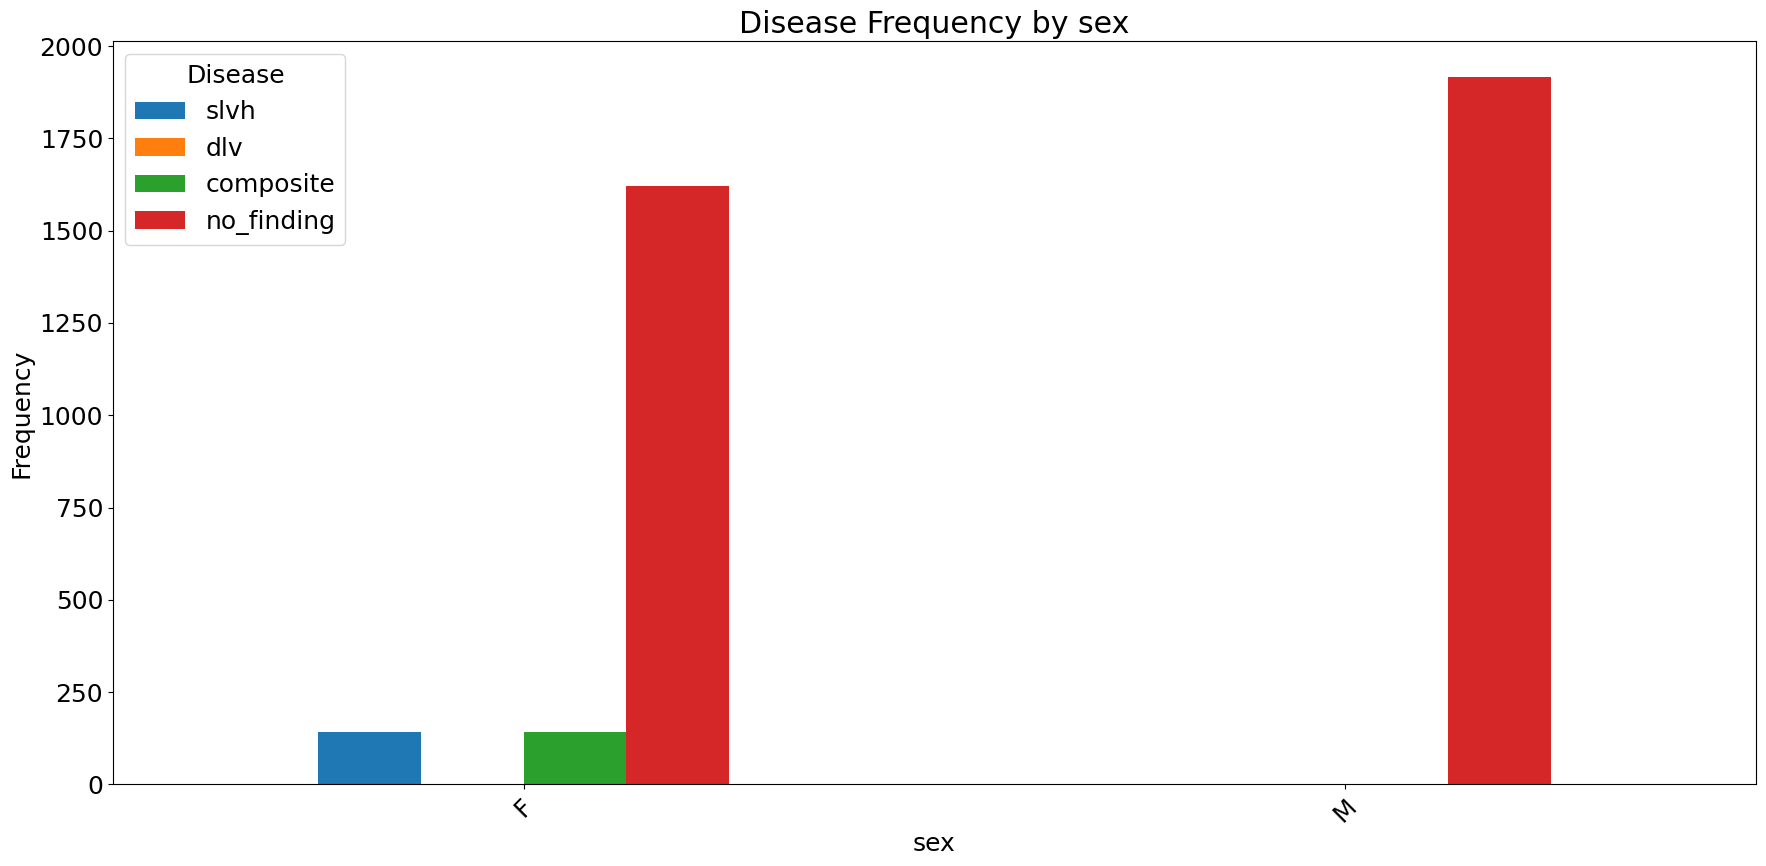

In [37]:
plot_frequency(metadata_with_predictions, 'sex')

/var/folders/3g/dkd_j4g50wv1bvsfzqwsn5n40000gn/T/ipykernel_9554/3997537136.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  frequencies = df.groupby(category)[disease_columns].sum()


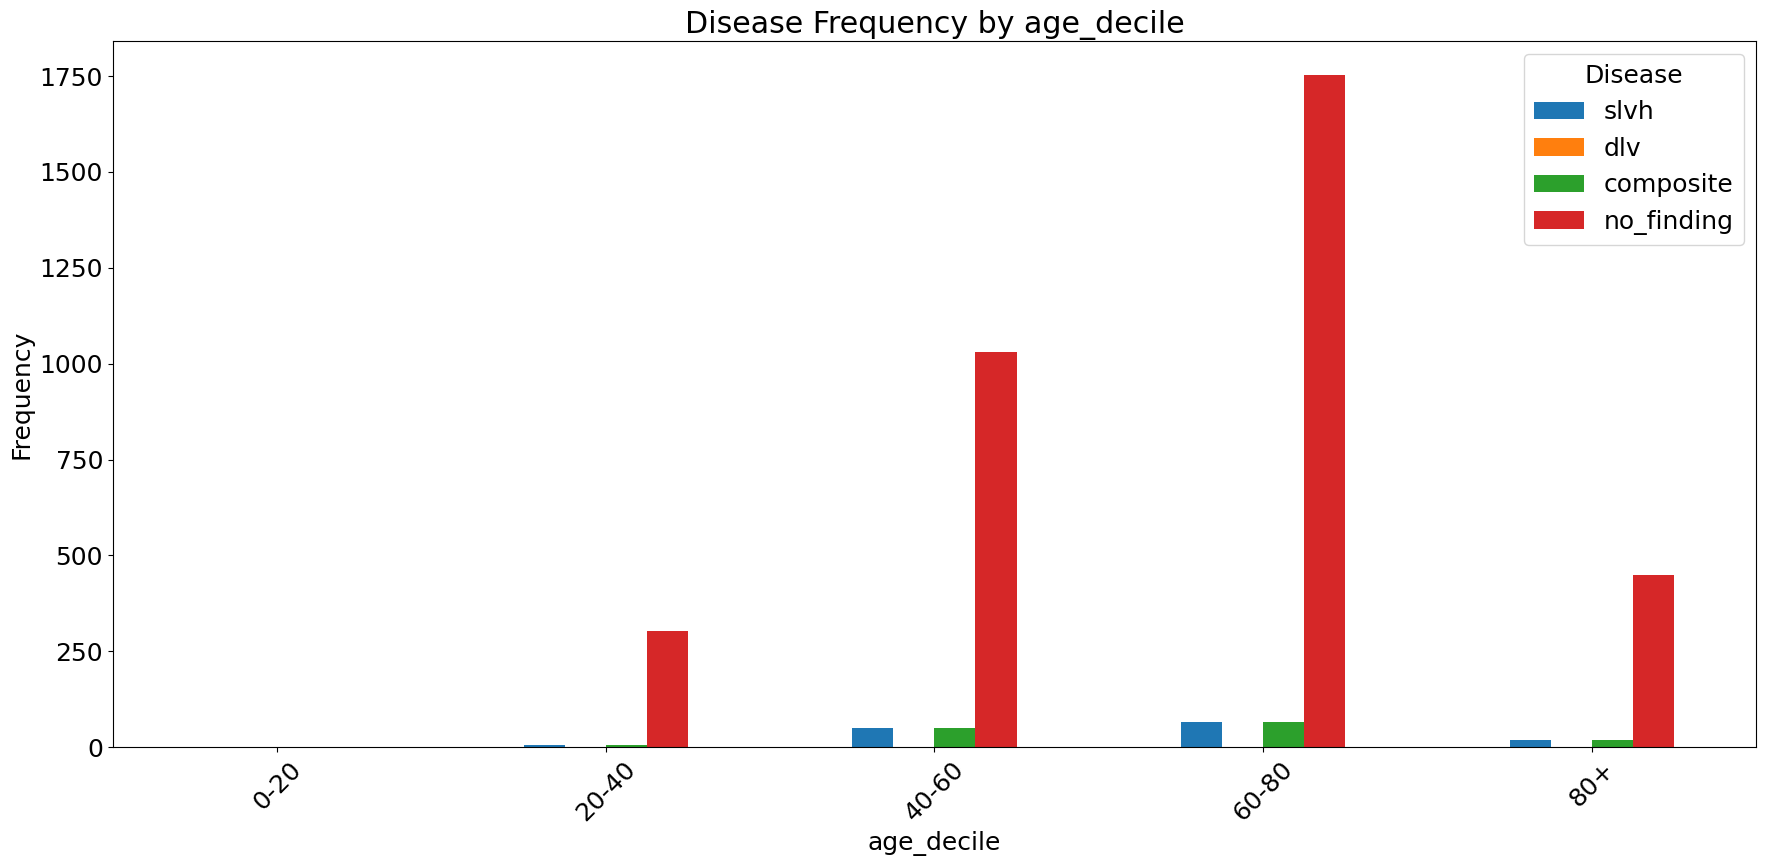

In [38]:
plot_frequency(metadata_with_predictions, 'age_decile')

In [39]:
def plot_14(df, category, save_path=f'./results/results{number}/'):
    plt.rcParams.update({'font.size': 18})
    disease_columns = [col for col in df.columns if 'labs' in col]
    predicted_columns = [col.replace('labs', 'classified') for col in disease_columns]

 
    # Convert columns to boolean
    for column in disease_columns + predicted_columns:
        df[column] = metadata_with_predictions[column].astype(bool)

    results = {}
    fig, ax = plt.subplots(figsize=(18, 9))

    for disease, pred in zip(disease_columns, predicted_columns):
        disease_name = disease.replace('_labs', '')
        disparities = df.groupby(category).apply(lambda x: np.divide((x[pred] & x[disease]).sum(), x[disease].sum()))
        results[disease_name] = disparities
        disparities.plot(ax=ax, label=disease_name)

    results_df = pd.DataFrame(results)
    print(results_df)
    results_df.to_csv(f"{save_path}TPR_Disparities_{category}_{number}.csv")

    ax.set_ylabel('TPR')
    ax.set_title(f'TPR Disparities across {category.capitalize()}')
    plt.xticks(rotation=45)
    plt.legend(title='Disease')
    plt.tight_layout()
    plt.savefig(f"{save_path}TPR_Disparities_{category}_{number}.pdf")
    plt.show()

/var/folders/3g/dkd_j4g50wv1bvsfzqwsn5n40000gn/T/ipykernel_9554/100369207.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  disparities = df.groupby(category).apply(lambda x: np.divide((x[pred] & x[disease]).sum(), x[disease].sum()))
/var/folders/3g/dkd_j4g50wv1bvsfzqwsn5n40000gn/T/ipykernel_9554/100369207.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  disparities = df.groupby(category).apply(lambd

         slvh  dlv  composite  no_finding
sex                                      
F    0.180233  0.0   0.155462    0.931714
M    0.000000  0.0   0.000000    1.000000


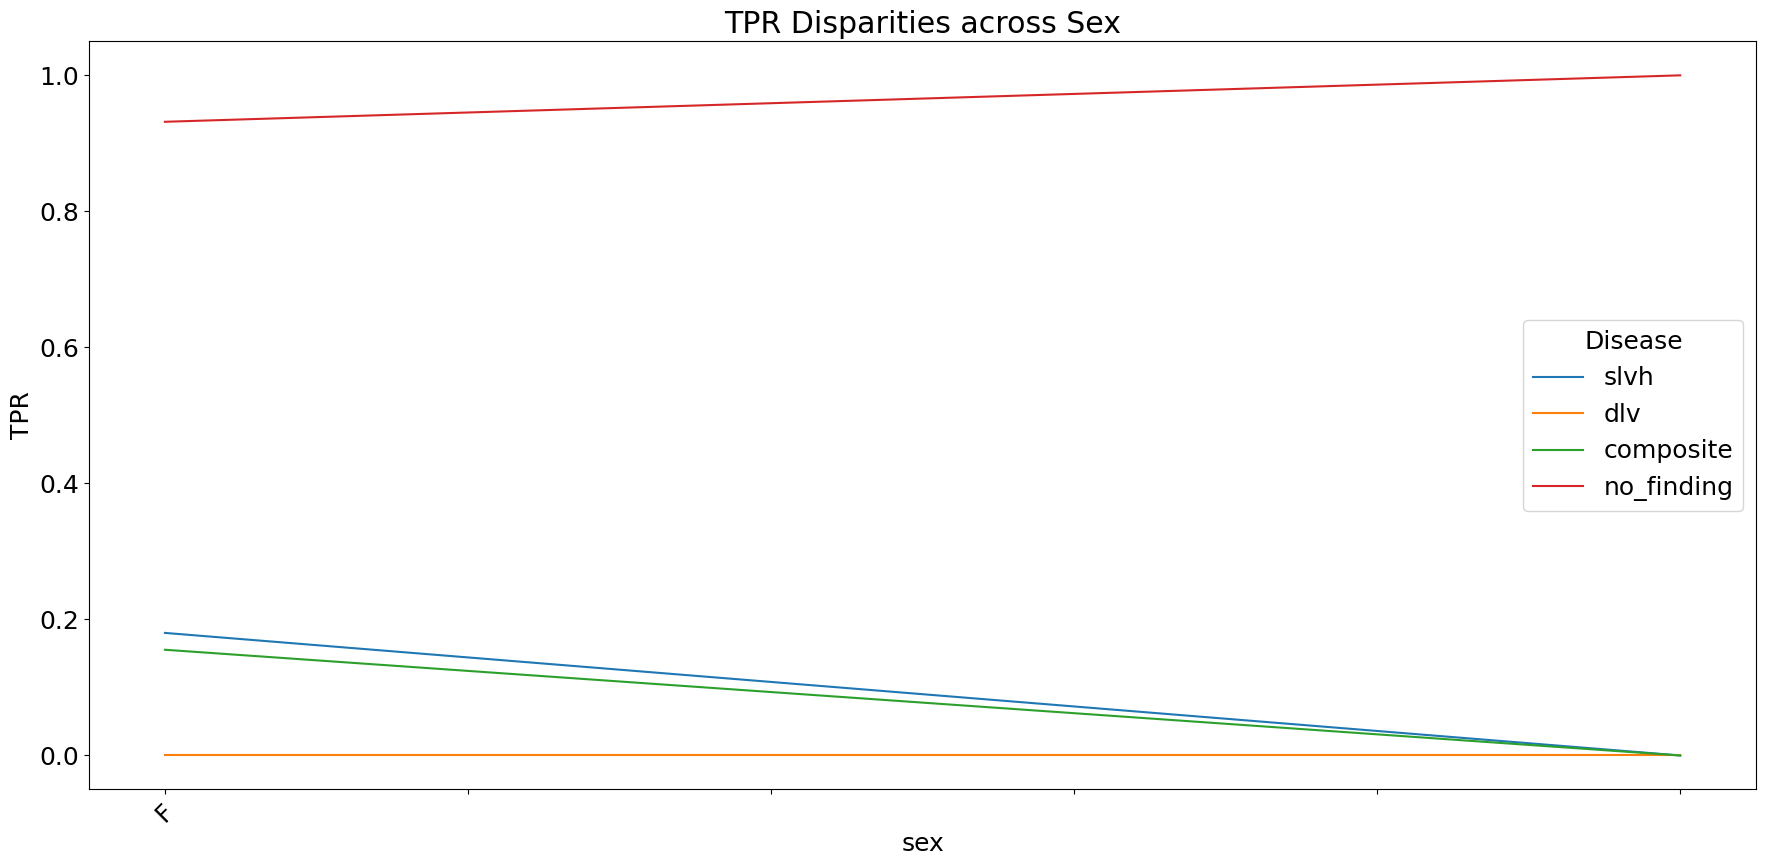

In [40]:
plot_14(metadata_with_predictions, 'sex')

/var/folders/3g/dkd_j4g50wv1bvsfzqwsn5n40000gn/T/ipykernel_9554/100369207.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disparities = df.groupby(category).apply(lambda x: np.divide((x[pred] & x[disease]).sum(), x[disease].sum()))
/var/folders/3g/dkd_j4g50wv1bvsfzqwsn5n40000gn/T/ipykernel_9554/100369207.py:16: RuntimeWarning: invalid value encountered in divide
  disparities = df.groupby(category).apply(lambda x: np.divide((x[pred] & x[disease]).sum(), x[disease].sum()))
/var/folders/3g/dkd_j4g50wv1bvsfzqwsn5n40000gn/T/ipykernel_9554/100369207.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude t

                slvh  dlv  composite  no_finding
age_decile                                      
0-20             NaN  NaN        NaN    1.000000
20-40       0.153846  0.0   0.076923    0.985915
40-60       0.087591  0.0   0.072115    0.961009
60-80       0.093750  0.0   0.067708    0.966830
80+         0.073529  0.0   0.079545    0.968338


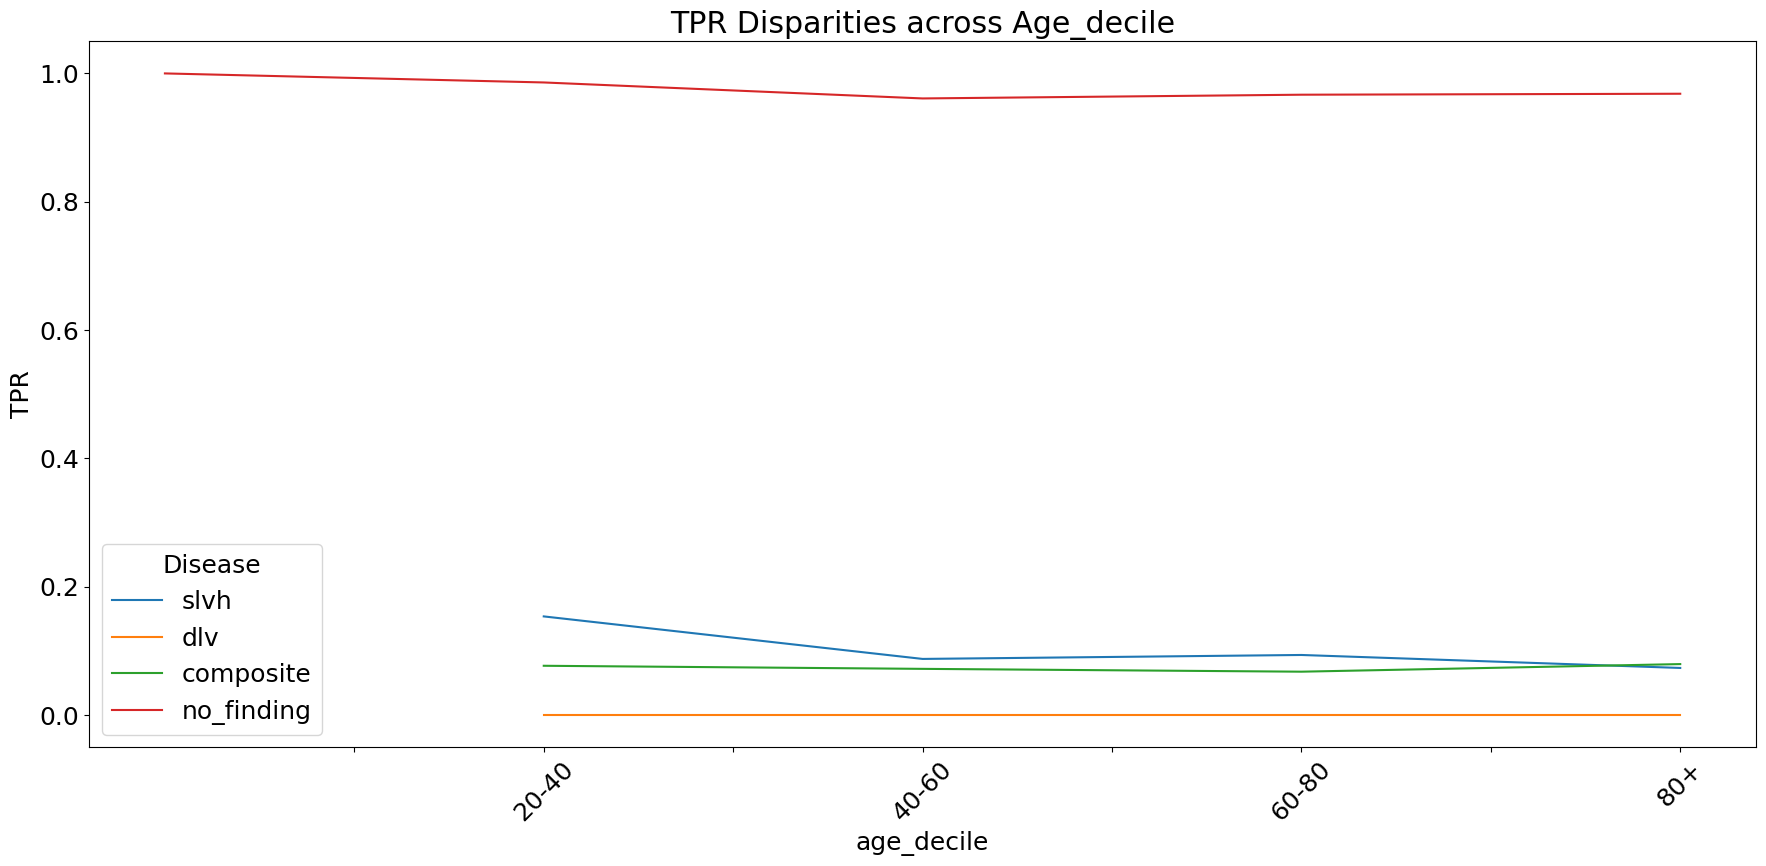

In [41]:
plot_14(metadata_with_predictions, 'age_decile')